<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/sobreviviendoaltitanicyaSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Final  - Sobreviviendo al Titanic
Jairo Salazar
Carnet:  

# Sección 1

Carga y analisis de datos

En esta seccion:



*   Carga de Datos al dataset
*   Verificacion de datos Faltantes
*   Tratamiendo de Datos Faltantes
*   Transformacion de variables categoricas



In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import graphviz

import datetime, os
from datetime import datetime
from datetime import date

print(tf.__version__)

if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

%load_ext tensorboard
!rm -rf ./logs/ 

2.5.0
Enabled compatitility to tf1.x
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [29]:
dataset = pd.read_csv('data_titanic_proyecto.csv')
dataset.columns = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Cabin','Embarked','passenger_class', 'passenger_sex', 'passenger_survived' ]
dataset.head()


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [30]:
dataset.dtypes

PassengerId             int64
Name                   object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
passenger_class        object
passenger_sex          object
passenger_survived     object
dtype: object

In [31]:
def FindingMissingValues (dataset):
  for column in dataset:
    x = dataset[column].isna().sum()
    print (column,' : ',str(x))

#calculando media, valor maximo, valor minimo, rango, desviacion estandard.
def dimensiones (ds,nombre):
  #Funcion que evalua cada variable en el dataset
  dimension = ds[nombre]

  dimension = dimension[np.logical_not(np.isnan(dimension))]
  media = np.mean(dimension)
  valmax = np.max(dimension)
  valmin = np.min(dimension)
  desvstd  = np.std(dimension)
  rango    = np.ptp(dimension)

  print('-------------------------------')
  print('      ', nombre)
  print ('Media: ',media)
  print ('Valor Maximo: ',valmax)
  print ('Valor Minimo: ',valmin)
  print ('Rango: ',rango)
  print ('Desviacion Standard: ',desvstd)
  #Graficar cada variable del dataset.
  sb.set_theme()
  #print(dimension.shape)
  sb.displot(dimension,kde=True)
  
 
FindingMissingValues(dataset)

PassengerId  :  0
Name  :  0
Age  :  177
SibSp  :  0
Parch  :  0
Ticket  :  0
Fare  :  0
Cabin  :  687
Embarked  :  2
passenger_class  :  0
passenger_sex  :  0
passenger_survived  :  0


**Datos Faltantes**


1.   Age(177)     19%
2.   Cabin(687)   77%
3.   Embarked(2)  0.22%

Para el parametro Cabin y Embarked, se agregara SC (sin cabina, Embarked A para posteriormente hacerle un encode, segun corresponda).

Para el parametro Age, se sacaran los datos del 79% restante para evaluar como cubrir los datos faltantes.




In [32]:
dataset["Cabin"].fillna("SC", inplace = True)
dataset["Embarked"].fillna("A", inplace = True)

-------------------------------
       Age
Media:  29.69911764705882
Mediana:  28.0
Valor Maximo:  80.0
Valor Minimo:  0.42
Rango:  79.58
Desviacion Standard:  14.516321150817317


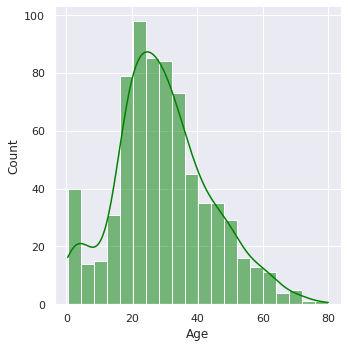

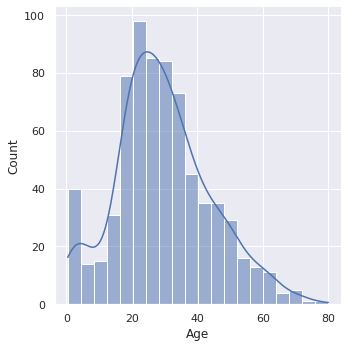

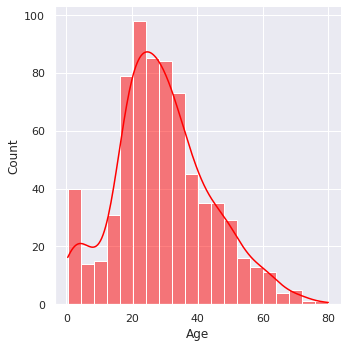

In [33]:
#reemplazando los valores faltantas por edad por los NAs


dsAge = dataset[dataset["Age"].notna()]
media = np.mean(dsAge["Age"])
median = np.median(dsAge["Age"])
valmax = np.max(dsAge["Age"])
valmin = np.min(dsAge["Age"])
desvstd  = np.std(dsAge["Age"])
rango    = np.ptp(dsAge["Age"])

print('-------------------------------')
print('      ', 'Age')
print ('Media: ',media)
print ('Mediana: ',median)
print ('Valor Maximo: ',valmax)
print ('Valor Minimo: ',valmin)
print ('Rango: ',rango)
print ('Desviacion Standard: ',desvstd)
sb.set_theme()
  #print(dimension.shape)
sb.displot(dataset["Age"],kde=True,color="green")
sb.displot(dsAge["Age"],kde=True)
dataset["Age"].fillna(median, inplace = True)
sb.displot(dsAge["Age"],kde=True,color="red")



**Encoding de variables cateoricas relevantes**

Se hara encoding de las variables categoricas relevantes:

- passenger_survived (valores(N,Y))
- Passenger sex (Valores (M,F))
- Passenger class (valores('Lower' 'Upper' 'Middle'))
- Embarked (valores('S' 'C' 'Q' 'A'))
- Cabin (valores(['SC' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148'])
 - Ticket descartado Es muy especifico
 - Nombre desacartado es muy especifico


In [34]:
print('-------------------------------')
print('      ', 'Passenger_survived (Variable Objetivo)')
print(dataset["passenger_survived"].unique())
print('-------------------------------')
print('      ', 'passenger_sex')
print(dataset["passenger_sex"].unique())
print('-------------------------------')
print('      ', 'passenger_class')
print(dataset["passenger_class"].unique())
print('-------------------------------')
print('      ', 'Embarked')
print(dataset["Embarked"].unique())
print('-------------------------------')
print('      ', 'Cabin')
print(dataset["Cabin"].unique())
print('-------------------------------')
print('      ', 'Ticket')
print(dataset["Ticket"].unique())


-------------------------------
       Passenger_survived (Variable Objetivo)
['N' 'Y']
-------------------------------
       passenger_sex
['M' 'F']
-------------------------------
       passenger_class
['Lower' 'Upper' 'Middle']
-------------------------------
       Embarked
['S' 'C' 'Q' 'A']
-------------------------------
       Cabin
['SC' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A1

In [36]:



cleanup_nums = {"passenger_survived":     {"N": 0, "Y": 1},
                "passenger_sex": {"M": 1, "F": 0},
                "passenger_class": {"Lower": 0, "Middle": 1,"Upper": 2},
                "Embarked": {"S": 0, "C": 1,"Q": 2,"A": 3}
                }
dataset = dataset.replace(cleanup_nums)

In [37]:
dataset

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,SC,0,0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,2,0,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,SC,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,2,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,SC,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,SC,0,1,1,0
887,888,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,2,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,SC,0,0,0,0
889,890,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,2,1,1


In [39]:
dataset["Cabin"] = dataset["Cabin"].astype('category')

dataset["Cabin_cat"] = dataset["Cabin"].cat.codes
dataset.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,Cabin_cat
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,SC,0,0,1,0,146
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,2,0,1,81
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,SC,0,0,0,1,146
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,2,0,1,55
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,SC,0,0,1,0,146


In [41]:
corrpearson = dataset.corr(method="pearson")
corrpearson



,PassengerId,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,Cabin_cat
PassengerId,1.000000,0.034212,-0.057527,-0.001652,0.012658,-0.029906,0.035144,0.042939,-0.005007,-0.035197
Age,0.034212,1.000000,-0.233296,-0.172482,0.096688,0.007505,0.339898,0.081163,-0.064910,-0.240312
SibSp,-0.057527,-0.233296,1.000000,0.414838,0.159651,-0.063794,-0.083081,-0.114631,-0.035322,0.043525
Parch,-0.001652,-0.172482,0.414838,1.000000,0.216225,-0.082144,-0.018443,-0.245489,0.081629,-0.028179
Fare,0.012658,0.096688,0.159651,0.216225,1.000000,0.071010,0.549500,-0.182333,0.257307,-0.502569
Embarked,-0.029906,0.007505,-0.063794,-0.082144,0.071010,1.000000,-0.028566,-0.128526,0.118026,-0.077932
passenger_class,0.035144,0.339898,-0.083081,-0.018443,0.549500,-0.028566,1.000000,-0.131900,0.338481,-0.682176
passenger_sex,0.042939,0.081163,-0.114631,-0.245489,-0.182333,-0.128526,-0.131900,1.000000,-0.543351,0.095991
passenger_survived,-0.005007,-0.064910,-0.035322,0.081629,0.257307,0.118026,0.338481,-0.543351,1.000000,-0.253658
Cabin_cat,-0.035197,-0.240312,0.043525,-0.028179,-0.502569,-0.077932,-0.682176,0.095991,-0.253658,1.000000


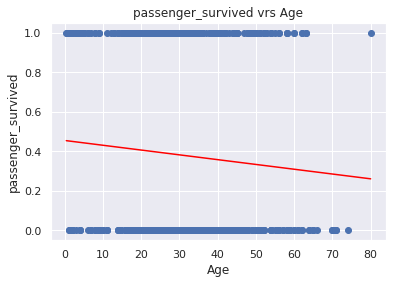

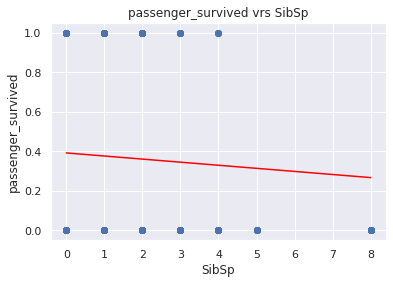

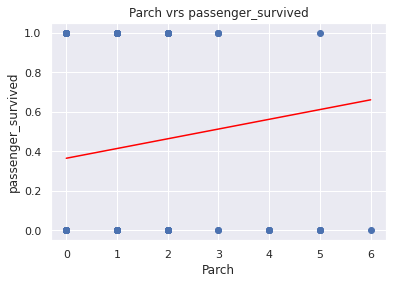

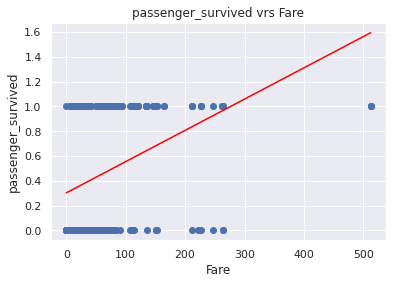

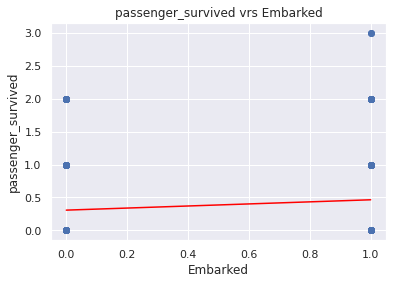

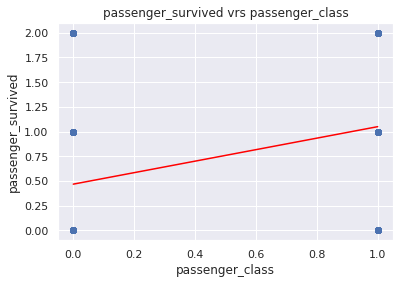

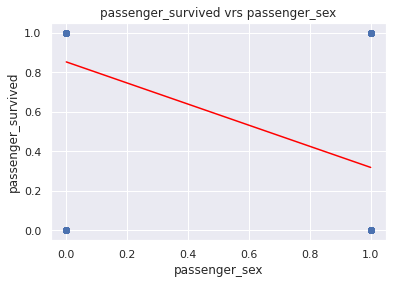

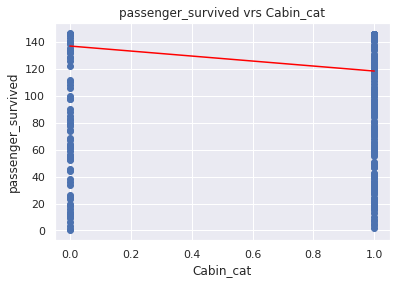

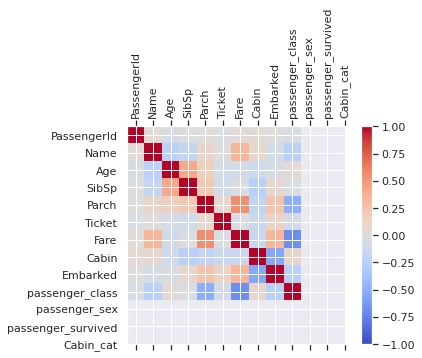

In [43]:
def GraficarCorrelacion (x,y,titulo,xtitulo,ytitulo,color1):
  plt.scatter(x,y)
  plt.title(titulo)
  plt.xlabel(xtitulo)
  plt.ylabel(ytitulo)
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color=color1)
  plt.show()





y = dataset['passenger_survived']
x = dataset['Age']

GraficarCorrelacion(x,y,'passenger_survived vrs Age','Age','passenger_survived','red')

x = dataset['SibSp']
GraficarCorrelacion(x,y,'passenger_survived vrs SibSp','SibSp','passenger_survived','red')

x = dataset['Parch']
GraficarCorrelacion(x,y,'Parch vrs passenger_survived','Parch','passenger_survived','red')

x = dataset['Fare']
GraficarCorrelacion(x,y,'passenger_survived vrs Fare','Fare','passenger_survived','red')

x = dataset['Embarked']

GraficarCorrelacion(y,x,'passenger_survived vrs Embarked','Embarked','passenger_survived','red')

x = dataset['passenger_class']

GraficarCorrelacion(y,x,'passenger_survived vrs passenger_class','passenger_class','passenger_survived','red')

x = dataset['passenger_sex']

GraficarCorrelacion(y,x,'passenger_survived vrs passenger_sex','passenger_sex','passenger_survived','red')

x = dataset['Cabin_cat']

GraficarCorrelacion(y,x,'passenger_survived vrs Cabin_cat','Cabin_cat','passenger_survived','red')




fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrpearson,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()










# Seccion II

Entrenamiento en base a los cuatro algoritmos indicados:



1.   Spliting Dataset - Train,Test,Eval (0.80,0.16,0.04)
2.   Ensemble Learning:
      *   Decision Tree - SkLearn
      *   Elemento de lista







In [55]:
#spliting Dataset
dataset.drop(['Name', 'Ticket'], axis=1)
Train, Test1 = train_test_split(dataset,train_size=0.8, random_state=42)
Test,Eval = train_test_split(Test1,train_size=0.8, random_state=42)






  


Exactitud del modelo:  0.6460674157303371


[Text(167.4, 181.2, 'X[0] <= 6.5\ngini = 0.472\nsamples = 712\nvalue = [440, 272]'),
 Text(83.7, 108.72, 'X[0] <= 2.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(41.85, 36.23999999999998, 'gini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 63.5\ngini = 0.461\nsamples = 674\nvalue = [431, 243]'),
 Text(209.25, 36.23999999999998, 'gini = 0.464\nsamples = 662\nvalue = [420, 242]'),
 Text(292.95, 36.23999999999998, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]')]

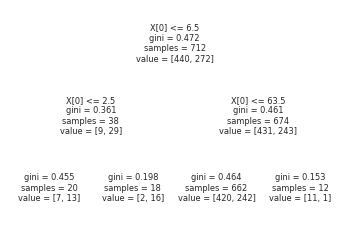

In [90]:
#sklearn DecisionTree
def DecisionTree(y,columnas):
  x = Train[columnas]
  tree_model = tree.DecisionTreeClassifier(max_depth = 2)
  model = tree_model.fit(X = x, 
                         y = y)
  valid_acc = model.score(X = x,
                          y = y)# We calculate accuracy with the fold validation data
        
    
  print('Exactitud del modelo: ',str(valid_acc))
  
  return model

c = ["Age"]
ytrain = Train["passenger_survived"]
traintree = DecisionTree(ytrain,c)
tree.plot_tree(traintree)



In [82]:
#svm con sklearn
def svm (y,columnas):
  x = Train[columnas]
  model = SVC()
  param_grid = {'C':[1,2,5,10,20,50]} 
  clf = GridSearchCV(model, param_grid=param_grid, cv = 10, n_jobs=1, return_train_score = True)
  clf.fit(x, y)
  return clf

ytrain = Train["passenger_survived"]
svmr = svm(ytrain,c)
gpd = pd.DataFrame(svmr.cv_results_)
print("Exactitud estimada del modelo:{0:1.4f}".format(gpd['mean_test_score'][svmr.best_index_]))


Exactitud estimada del modelo:0.6432


In [96]:
def naiveBayes(y,columnas):
  x = Train[columnas]
  modelo= GaussianNB()
  modelo.fit(x, y)
  modelo.class_prior_
  yhat=modelo.predict(x)
  accuracy=round(accuracy_score(yhat,y),3)
  print(accuracy)
  
  return modelo

ytrain = Train["passenger_survived"]
naiveBayes(ytrain,c)


0.64


GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
class LogisticRegression:
  def __init__(self,no_features,no_clases,beta,L2):
 
    self.W = tf.Variable(tf.ones([no_features, no_clases]), name="w")
    self.b = tf.Variable(tf.zeros([no_clases]), name="bias")
    self.error_summary = tf.summary.scalar("error_summary",0)
    self.beta = tf.summary.scalar("Beta",beta) #hiperaparametro

    self.accuracy = tf.summary.scalar("accuracy",0)
    self.L2 = tf.summary.scalar("L2",L2)

  def __call__(self,x):
    
    return tf.nn.softmax(tf.matmul(x, self.W) + self.b)

  def regresion_logistica(self,x):

    
    return tf.nn.softmax(tf.matmul(x, self.W) + self.b)
    
  def cross_entropy(self,y_pred, y_true):

    y_true = tf.one_hot(tf.cast(y_true,dtype=tf.int32), depth=10)

  
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

  
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

  def exactitud(self,y_pred, y_true):
    prediccion_correcta = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(prediccion_correcta, tf.float32))

  def L2(self,error):
    regulizador = tf.nn.l2_loss(self.W)
    return tf.reduce_mean(error+self.beta * regulizador)

  def optimizacion(self,x, y,learning_rate):

      pred = self.regresion_logistica(x)
     
      error = self.cross_entropy(pred, y)
      if (self.L2 == 1):
        error = self.L2(error)

      self.error_summary = tf.summary.scalar("error_summary",error)
      #aca va la funcion de costo y la optimizacion por gradiente.
      dc_dw, dc_db = tf.gradients(error,[self.W,self.b],name="Gradients")
   
     
      #gradientem = tf.reduce_mean((yhat-y)*x)#((yhat-y)*x)/1168
      #gradienteb = tf.reduce_mean(yhat-y)
     
      actualizacion_w = tf.assign(self.W, self.W - learning_rate*dc_dw,name="actualizacion_w" )
      actualizacion_b = tf.assign(self.b, self.b - learning_rate*dc_db,name="actualizacion_b" )
      accuracy1 = self.exactitud(pred,y)
      self.accuracy = accuracy1
      actualizacion_parametros = tf.group(actualizacion_w,actualizacion_b,self.error_summary,self.accuracy)



      return actualizacion_parametros